# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import matplotlib.pyplot as plt
from datetime import date, timedelta

%matplotlib inline

In [2]:
# Declare datetime variables
today = date.today().isoformat()
five_yrs_ago = (date.today() - timedelta(days = 5 * 365)).isoformat()

# Print datetime variables 
print(today)
print(five_yrs_ago)

2021-05-15
2016-05-16


In [3]:
# Declare variable for outputting report
final_rpt = []

In [4]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [5]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [7]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_price = btc_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
my_crypto_total = my_btc_value + my_eth_value

# Print current crypto wallet balance

btc_val_rpt = (f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}  ")
eth_val_rpt = (f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}  ")
crypto_total_rpt = (f"The total value of your crypto portfolio is ${my_crypto_total:0.2f}  ")

crypto_rpt = [btc_val_rpt, eth_val_rpt, crypto_total_rpt]
final_rpt.append(crypto_rpt)
for i in crypto_rpt:
    print(i)

The current value of your 1.2 BTC is $57013.20  
The current value of your 5.3 ETH is $19587.47  
The total value of your crypto portfolio is $76600.67  


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
alpaca_key = os.getenv('ALPACA_API_KEY')
alpaca_secret = os.getenv('ALPACA_API_SECRET')

# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_key, alpaca_secret, api_version = "v2")

In [10]:
# Format current date as ISO format

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
start = pd.Timestamp('2021-05-14', tz = 'US/Pacific').isoformat()
end = pd.Timestamp('2021-05-14', tz = 'US/Pacific').isoformat()
spy_agg = alpaca.get_barset(tickers, timeframe, start = start, end = end).df

# Preview DataFrame
spy_agg

AGG                                       SPY  \
                             open    high       low   close   volume   open   
time                                                                          
2021-05-14 00:00:00-04:00  114.22  114.28  114.1219  114.28  3711363  413.2   

                                                             
                             high     low   close    volume  
time                                                         
2021-05-14 00:00:00-04:00  417.49  413.18  416.53  69012933

In [11]:
# Pick AGG and SPY close prices
agg_close_price = spy_agg.iloc[0, 3]
spy_close_price = spy_agg.iloc[0, 8]

# Print AGG and SPY close prices
agg_close_rpt = (f"Current AGG closing price: ${agg_close_price:0.2f}")
spy_close_rpt = (f"Current SPY closing price: ${spy_close_price:0.2f}")

stock_price_rpt = [agg_close_rpt, spy_close_rpt]
final_rpt.append(stock_price_rpt)
for i in stock_price_rpt:
    print(i)

Current AGG closing price: $114.28
Current SPY closing price: $416.53


In [12]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
my_stocks_total = my_agg_value + my_spy_value

# Print current value of share
my_spy_rpt = (f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
my_agg_rpt = (f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
my_shares_rpt = (f"The total value of your stocks is ${my_stocks_total:0.2f}")

shares_rpt = [my_agg_rpt, my_spy_rpt, my_shares_rpt]
final_rpt.append(shares_rpt)
for i in shares_rpt:
    print(i)

The current value of your 200 AGG shares is $22856.00
The current value of your 50 SPY shares is $20826.50
The total value of your stocks is $43682.50


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income = 12000
# Create savings DataFrame
savings_data = [{'Savings': my_crypto_total}, {'Savings': my_stocks_total}]
df_savings = pd.DataFrame(savings_data, index = ['Crypto', 'Stocks'])
total_savings = my_crypto_total + my_stocks_total
# Display savings DataFrame
display(df_savings)
print(total_savings)

,Savings
Crypto,76600.675
Stocks,43682.500


120283.17499999999


You have a total of $120283.17 in savings
64% of your savings is in crypto-currency
36% of your savings is in stocks & bonds


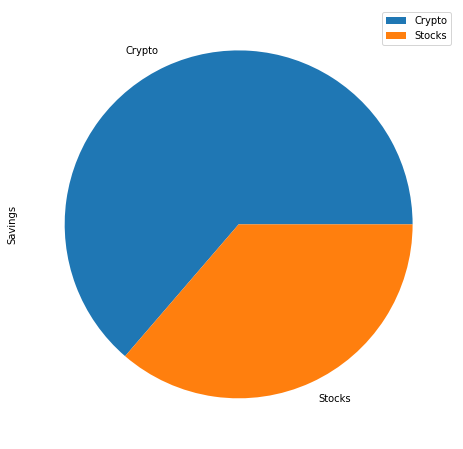

In [14]:
# Plot savings pie chart
df_savings.plot.pie(y = 'Savings', figsize = (8, 8))
plt.savefig('Images/pie.png')
pie_rpt = (f'You have a total of ${total_savings:0.2f} in savings')
pct_crypto_rpt = (f'{((my_crypto_total / total_savings) * 100):0.0f}% of your savings is in crypto-currency')
pct_stocks_rpt = (f'{((my_stocks_total / total_savings) * 100):0.0f}% of your savings is in stocks & bonds')
savings_rpt = [pie_rpt, pct_crypto_rpt, pct_stocks_rpt]
for i in savings_rpt:
    print(i)

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings_total = my_crypto_total + my_stocks_total

# Validate saving health
if savings_total >= emergency_fund:
    savings_eval = ('Congratulations, you have more than 3 months income in your savings!')
else:
    savings_eval = (f'You need to increase your savings by ${emergency_fund - savings_total} as soon as possible!')
print(savings_eval)
savings_rpt.append(savings_eval)
final_rpt.append(savings_rpt)

Congratulations, you have more than 3 months income in your savings!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp(five_yrs_ago, tz='America/New_York').isoformat()
end_date = pd.Timestamp(today, tz='America/New_York').isoformat()

In [17]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
timeframe = '1D'
df_stock_data = alpaca.get_barset(tickers, timeframe, start = start_date, end = end_date, limit = 1000).df

# Display sample data
df_stock_data.sample(5)

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2017-07-06 00:00:00-04:00  108.95  109.0000  108.8200  108.95  2057393.0   
2018-08-29 00:00:00-04:00  106.38  106.4100  106.2900  106.36  1881163.0   
2017-09-18 00:00:00-04:00  109.86  109.9000  109.7705  109.85  1621727.0   
2018-07-10 00:00:00-04:00  106.28  106.3000  106.1900  106.24  2007063.0   
2017-06-23 00:00:00-04:00  110.01  110.1085  109.9800  110.07  1101304.0   

                              SPY                                        
                             open    high       low   close      volume  
time                                                                     
2017-07-06 00:00:00-04:00  241.88  242.03  240.3400  240.58  52390161.0  
2018-08-29 00:00:00-04:00  290.16  291.74  289.8854  291.47  38873854.0  
2017-09-18 00:00:00-04:00  249.61  250.12  249.2800  249.69  31002452.0  
2018-07-10 00:00:00-04:00  278.41  279.01  278.0800  278.82  38072685.0  
2017-06-23 00:00:00-04:00  242.91  243.51  242.4700  243.16  45792641.0

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_sim_30 = MCSimulation(df_stock_data, [.4, .6], 500, 252 * 30)

In [19]:
# Printing the simulation input data
df_stock_data

AGG                                        \
                             open    high       low    close     volume   
time                                                                      
2017-05-24 00:00:00-04:00  109.25  109.50  109.2115  109.450  2325960.0   
2017-05-25 00:00:00-04:00  109.45  109.49  109.3701  109.460  1382257.0   
2017-05-26 00:00:00-04:00  109.46  109.54  109.4400  109.480   853245.0   
2017-05-30 00:00:00-04:00  109.58  109.66  109.5400  109.635  1199625.0   
2017-05-31 00:00:00-04:00  109.64  109.81  109.6400  109.750  2011554.0   
...                           ...     ...       ...      ...        ...   
2021-05-10 00:00:00-04:00  114.61  114.72  114.4000  114.430  4737416.0   
2021-05-11 00:00:00-04:00  114.23  114.38  114.1300  114.190  5986456.0   
2021-05-12 00:00:00-04:00  113.98  114.01  113.7900  113.790  6392314.0   
2021-05-13 00:00:00-04:00  113.90  114.06  113.7800  114.015  5446892.0   
2021-05-14 00:00:00-04:00  114.22  114.28  114.1219  114.280  3711363.0   

                              SPY                                       
                             open    high     low   close       volume  
time                                                                    
2017-05-24 00:00:00-04:00     NaN     NaN     NaN     NaN          NaN  
2017-05-25 00:00:00-04:00  241.20  242.08  240.96  241.71   45278321.0  
2017-05-26 00:00:00-04:00  241.55  241.90  241.45  241.74   30002081.0  
2017-05-30 00:00:00-04:00  241.33  241.79  241.16  241.52   28437351.0  
2017-05-31 00:00:00-04:00  241.84  241.88  240.64  241.42   59140588.0  
...                           ...     ...     ...     ...          ...  
2021-05-10 00:00:00-04:00  422.50  422.74  417.81  417.98   72076213.0  
2021-05-11 00:00:00-04:00  413.10  415.27  410.06  414.27  105864172.0  
2021-05-12 00:00:00-04:00  411.23  412.59  404.00  405.45  117663357.0  
2021-05-13 00:00:00-04:00  407.07  412.35  407.02  410.26   96524121.0  
2021-05-14 00:00:00-04:00  413.20  417.49  413.18  416.53   69012933.0  

[1001 rows x 10 columns]

In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_sim_30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006586,0.995864,1.002717,0.988371,1.005599,0.997536,0.999765,1.000905,1.016302,0.995281,...,1.021985,1.017488,0.998565,1.012472,1.015349,1.005339,0.992771,0.979906,1.018408,1.004616
2,1.018158,1.000762,1.008959,0.988136,1.006414,1.004380,1.000475,1.000908,1.014098,0.984130,...,1.009078,1.005888,1.012713,0.997082,1.018731,1.000846,0.999322,0.975372,1.026035,1.013412
3,1.017235,1.001398,1.014210,0.980603,1.018047,1.015874,1.003322,0.991648,1.031074,0.992838,...,1.010269,1.001884,0.999272,0.999065,1.017175,1.005658,0.992117,0.971259,1.022251,1.016809
4,1.016813,1.007873,1.007781,0.978050,1.018792,1.014640,1.001266,0.988810,1.023450,0.988365,...,1.018996,1.009760,1.001813,0.985816,1.022367,1.003309,0.985572,0.962241,1.029218,1.031838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,40.160943,7.500320,26.321171,7.720196,13.257324,5.970908,22.461426,11.329148,18.683381,7.612420,...,26.336699,6.254770,6.831356,5.675781,7.263205,16.600582,9.459616,19.215276,77.049227,2.404239
7557,39.916830,7.535762,26.443817,7.683961,13.212646,6.013436,22.561508,11.390551,18.901890,7.725874,...,26.301780,6.217987,6.889802,5.665848,7.336648,16.891777,9.638695,19.417366,77.298292,2.397946
7558,39.779739,7.577024,26.336392,7.769461,13.189481,5.954534,22.198806,11.285188,18.966083,7.835289,...,26.230254,6.310145,6.836782,5.696831,7.317940,16.583169,9.717103,19.565606,77.195902,2.395261
7559,39.598192,7.627821,26.421622,7.763343,12.956785,5.926606,22.285795,11.232945,18.950392,7.882352,...,26.316051,6.372192,6.732188,5.667873,7.326866,16.661647,9.809555,19.557108,77.291971,2.404558


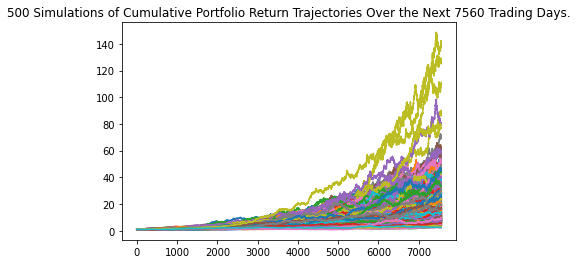

In [21]:
# Plot simulation outcomes
mc_sim_30.plot_simulation()
plt.savefig('Images/sim_returns_30.png')

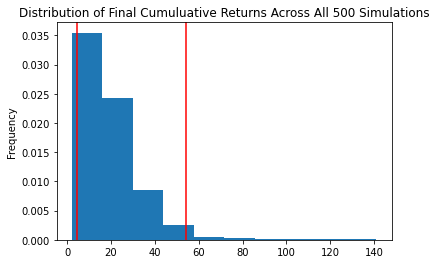

In [22]:
# Plot probability distribution and confidence intervals
mc_sim_30.plot_distribution()
plt.savefig('Images/dist_returns_30.png')

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
my_sim_summary = mc_sim_30.summarize_cumulative_return()

# Print summary statistics
print(my_sim_summary)

count           500.000000
mean             19.816624
std              15.201269
min               2.208362
25%               9.610838
50%              16.211861
75%              25.812521
max             141.004942
95% CI Lower      4.592048
95% CI Upper     54.188342
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(my_sim_summary.loc['95% CI Lower'] * initial_investment, 2)
ci_upper = round(my_sim_summary.loc['95% CI Upper'] * initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within the range of $91840.97 and $1083766.84


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(my_sim_summary.loc['95% CI Lower'] * initial_investment, 2)
ci_upper = round(my_sim_summary.loc['95% CI Upper'] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within the range of $137761.45 and $1625650.25


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
mc_sim_5 = MCSimulation(df_stock_data, [.1, .9], 500, 252 * 5)

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_sim_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998978,0.985816,0.998311,1.000777,1.015320,0.985304,1.002114,0.983168,0.995905,1.025733,...,1.006481,1.007229,1.017830,0.999078,0.997377,0.991678,0.980896,0.995814,0.994080,1.008052
2,1.010615,0.978483,0.998789,1.005362,1.017692,0.978218,0.998798,0.981033,0.995302,1.029844,...,1.009996,1.004667,1.029730,0.981643,1.000052,0.980414,0.998360,0.986960,0.968996,1.013038
3,0.996441,0.975605,0.998007,0.985862,0.997630,0.968087,1.018536,0.982711,1.005476,1.029181,...,1.023813,0.988807,1.022575,0.976870,0.995107,0.998105,1.005452,1.004329,0.976695,1.006278
4,1.005194,0.976228,1.021570,0.993032,0.966784,0.970943,1.002045,0.983641,1.011731,1.019252,...,1.035624,0.997306,1.039625,0.963212,1.017190,0.986868,1.010572,1.024141,0.977826,0.991105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.520803,1.575226,2.805700,0.891021,1.336269,0.934222,2.042086,2.958043,4.044250,1.442467,...,2.159865,2.866003,2.752504,1.639413,1.997952,1.582110,1.150871,2.247582,1.191900,1.379323
1257,2.535853,1.546467,2.750949,0.902858,1.346365,0.917306,2.034303,2.969044,4.018851,1.467577,...,2.136186,2.848315,2.744756,1.637544,1.981669,1.562076,1.156549,2.265326,1.179497,1.395004
1258,2.545835,1.567566,2.763169,0.918588,1.379082,0.916600,2.031210,2.992982,4.065428,1.448910,...,2.132007,2.872379,2.774485,1.621764,1.972091,1.570675,1.134709,2.221841,1.163604,1.402296
1259,2.510483,1.571042,2.810132,0.947141,1.360140,0.906908,2.024150,2.949777,4.115164,1.443160,...,2.130340,2.903624,2.775651,1.594112,1.980312,1.564847,1.118354,2.244043,1.143766,1.404301


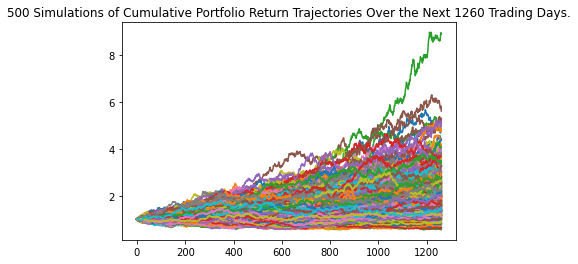

In [28]:
# Plot simulation outcomes
mc_sim_5.plot_simulation()
plt.savefig('Images/sim_returns_5.png')

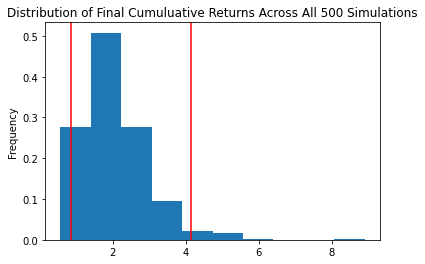

In [29]:
# Plot probability distribution and confidence intervals
mc_sim_5.plot_distribution()
plt.savefig('Images/dist_returns_5.png')

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
my_sim_5_summary = mc_sim_5.summarize_cumulative_return()

# Print summary statistics
print(my_sim_5_summary)

count           500.000000
mean              2.059960
std               0.894847
min               0.557543
25%               1.420605
50%               1.909766
75%               2.514250
max               8.906615
95% CI Lower      0.836631
95% CI Upper      4.151925
Name: 1260, dtype: float64


In [31]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(my_sim_5_summary.loc['95% CI Lower'] * initial_investment, 2)
ci_upper_five = round(my_sim_5_summary.loc['95% CI Upper'] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within the range of $16732.63 and $83038.5


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
mc_sim_10 = MCSimulation(df_stock_data, [.1, .9], 500, 252 * 10)

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_sim_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995725,1.012154,1.018427,1.024122,0.992752,0.995533,1.005362,0.998101,1.026186,1.000003,...,1.011738,0.979679,0.996196,0.998536,0.998118,0.996885,0.995823,1.014597,0.995852,1.008511
2,1.011208,1.017748,1.018732,1.000314,1.003654,1.003478,0.999382,0.982330,1.026805,1.002622,...,1.019830,0.971134,0.993181,0.972973,0.999932,1.010393,0.979153,1.014712,1.010390,1.014165
3,1.012922,0.992029,1.003245,1.011896,0.975132,0.988774,1.014974,0.987895,1.034450,0.988935,...,1.029818,0.967255,0.988058,0.958809,0.998391,1.019664,0.982818,1.017631,0.995037,0.991540
4,1.018099,0.988942,0.993453,1.011528,0.975983,0.995905,0.995743,0.978336,1.065366,0.973611,...,1.032546,0.975706,0.992837,0.967740,0.992474,1.018361,0.982699,1.020379,0.988658,0.990936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,6.169026,6.203561,1.432973,2.496382,1.346515,1.624247,1.930628,4.593577,4.019158,6.199418,...,3.313006,3.330930,2.205715,2.727067,2.879683,2.433598,4.055524,3.465741,3.840481,8.862752
2517,6.090911,6.250450,1.451983,2.495142,1.329742,1.623722,1.947889,4.510649,4.029942,6.222129,...,3.254451,3.319263,2.185993,2.780107,2.932186,2.410846,4.115265,3.474302,3.796620,8.895059
2518,6.097146,6.322834,1.442366,2.535804,1.322089,1.597506,1.925428,4.543558,4.080856,6.347274,...,3.293180,3.335964,2.183606,2.800832,2.957541,2.449868,4.066326,3.484715,3.814329,8.718251
2519,6.104605,6.202503,1.451478,2.485297,1.305459,1.607916,1.943926,4.434752,4.032841,6.309683,...,3.291087,3.350722,2.166118,2.814154,2.975388,2.435120,4.090556,3.485902,3.754084,8.589315


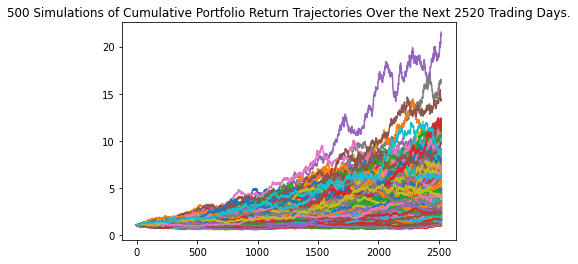

In [34]:
# Plot simulation outcomes
mc_sim_10.plot_simulation()
plt.savefig('Images/sim_returns_10.png')

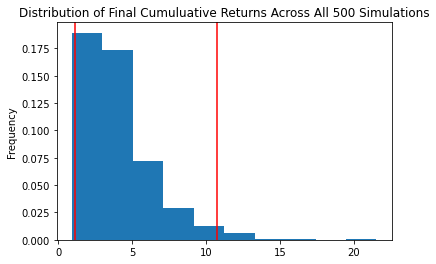

In [35]:
# Plot probability distribution and confidence intervals
mc_sim_10.plot_distribution()
plt.savefig('Images/dist_returns_10.png')

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
my_sim_10_summary = mc_sim_10.summarize_cumulative_return()

# Print summary statistics
print(my_sim_10_summary)

count           500.000000
mean              4.086263
std               2.497756
min               0.945046
25%               2.287653
50%               3.556031
75%               5.081123
max              21.532514
95% CI Lower      1.165168
95% CI Upper     10.782876
Name: 2520, dtype: float64


In [37]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(my_sim_10_summary.loc['95% CI Lower'] * initial_investment, 2)
ci_upper_ten = round(my_sim_10_summary.loc['95% CI Upper'] * initial_investment, 2)

# Print result
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within the range of $23303.36 and $215657.52


In [39]:
# Find initial investment needed to achieve mean return of 30 year investment

# Declare variable with value of original retire-at-30 years analysis mean
thirty_yr_mean = my_sim_summary.loc['mean'] * initial_investment

# Declare variabls for simulated 5 & 10 year means
mean_five = my_sim_5_summary.loc['mean']
mean_ten = my_sim_10_summary.loc['mean']

# Define a function that accepts simulated mean and targeted return
# Returns initial investment needed to reach target
def find_initial_investment(mean, target):
    i = 0
    while (i * mean) < target:
        i += 1000
    
    return i

# Run function on simulated 5 & 10 year means
five_investment = find_initial_investment(mean_five, thirty_yr_mean)
ten_investment = find_initial_investment(mean_ten, thirty_yr_mean)

# Explain the findings
print(f'The mean return on ${initial_investment} invested for 30 years is ${thirty_yr_mean:0.2f}.')
print(f'In order to achieve the same mean investment in 10 years, you need to invest ${ten_investment:0.2f}.')
print(f'The amount increases to ${five_investment:0.2f} if you expect that mean return in only 5 years.')

The mean return on $20000 invested for 30 years is $396332.49.
In order to achieve the same mean investment in 10 years, you need to invest $97000.00.
The amount increases to $193000.00 if you expect that mean return in only 5 years.
